<a href="https://colab.research.google.com/github/puraminy/mini_proj3/blob/master/MexicanHat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

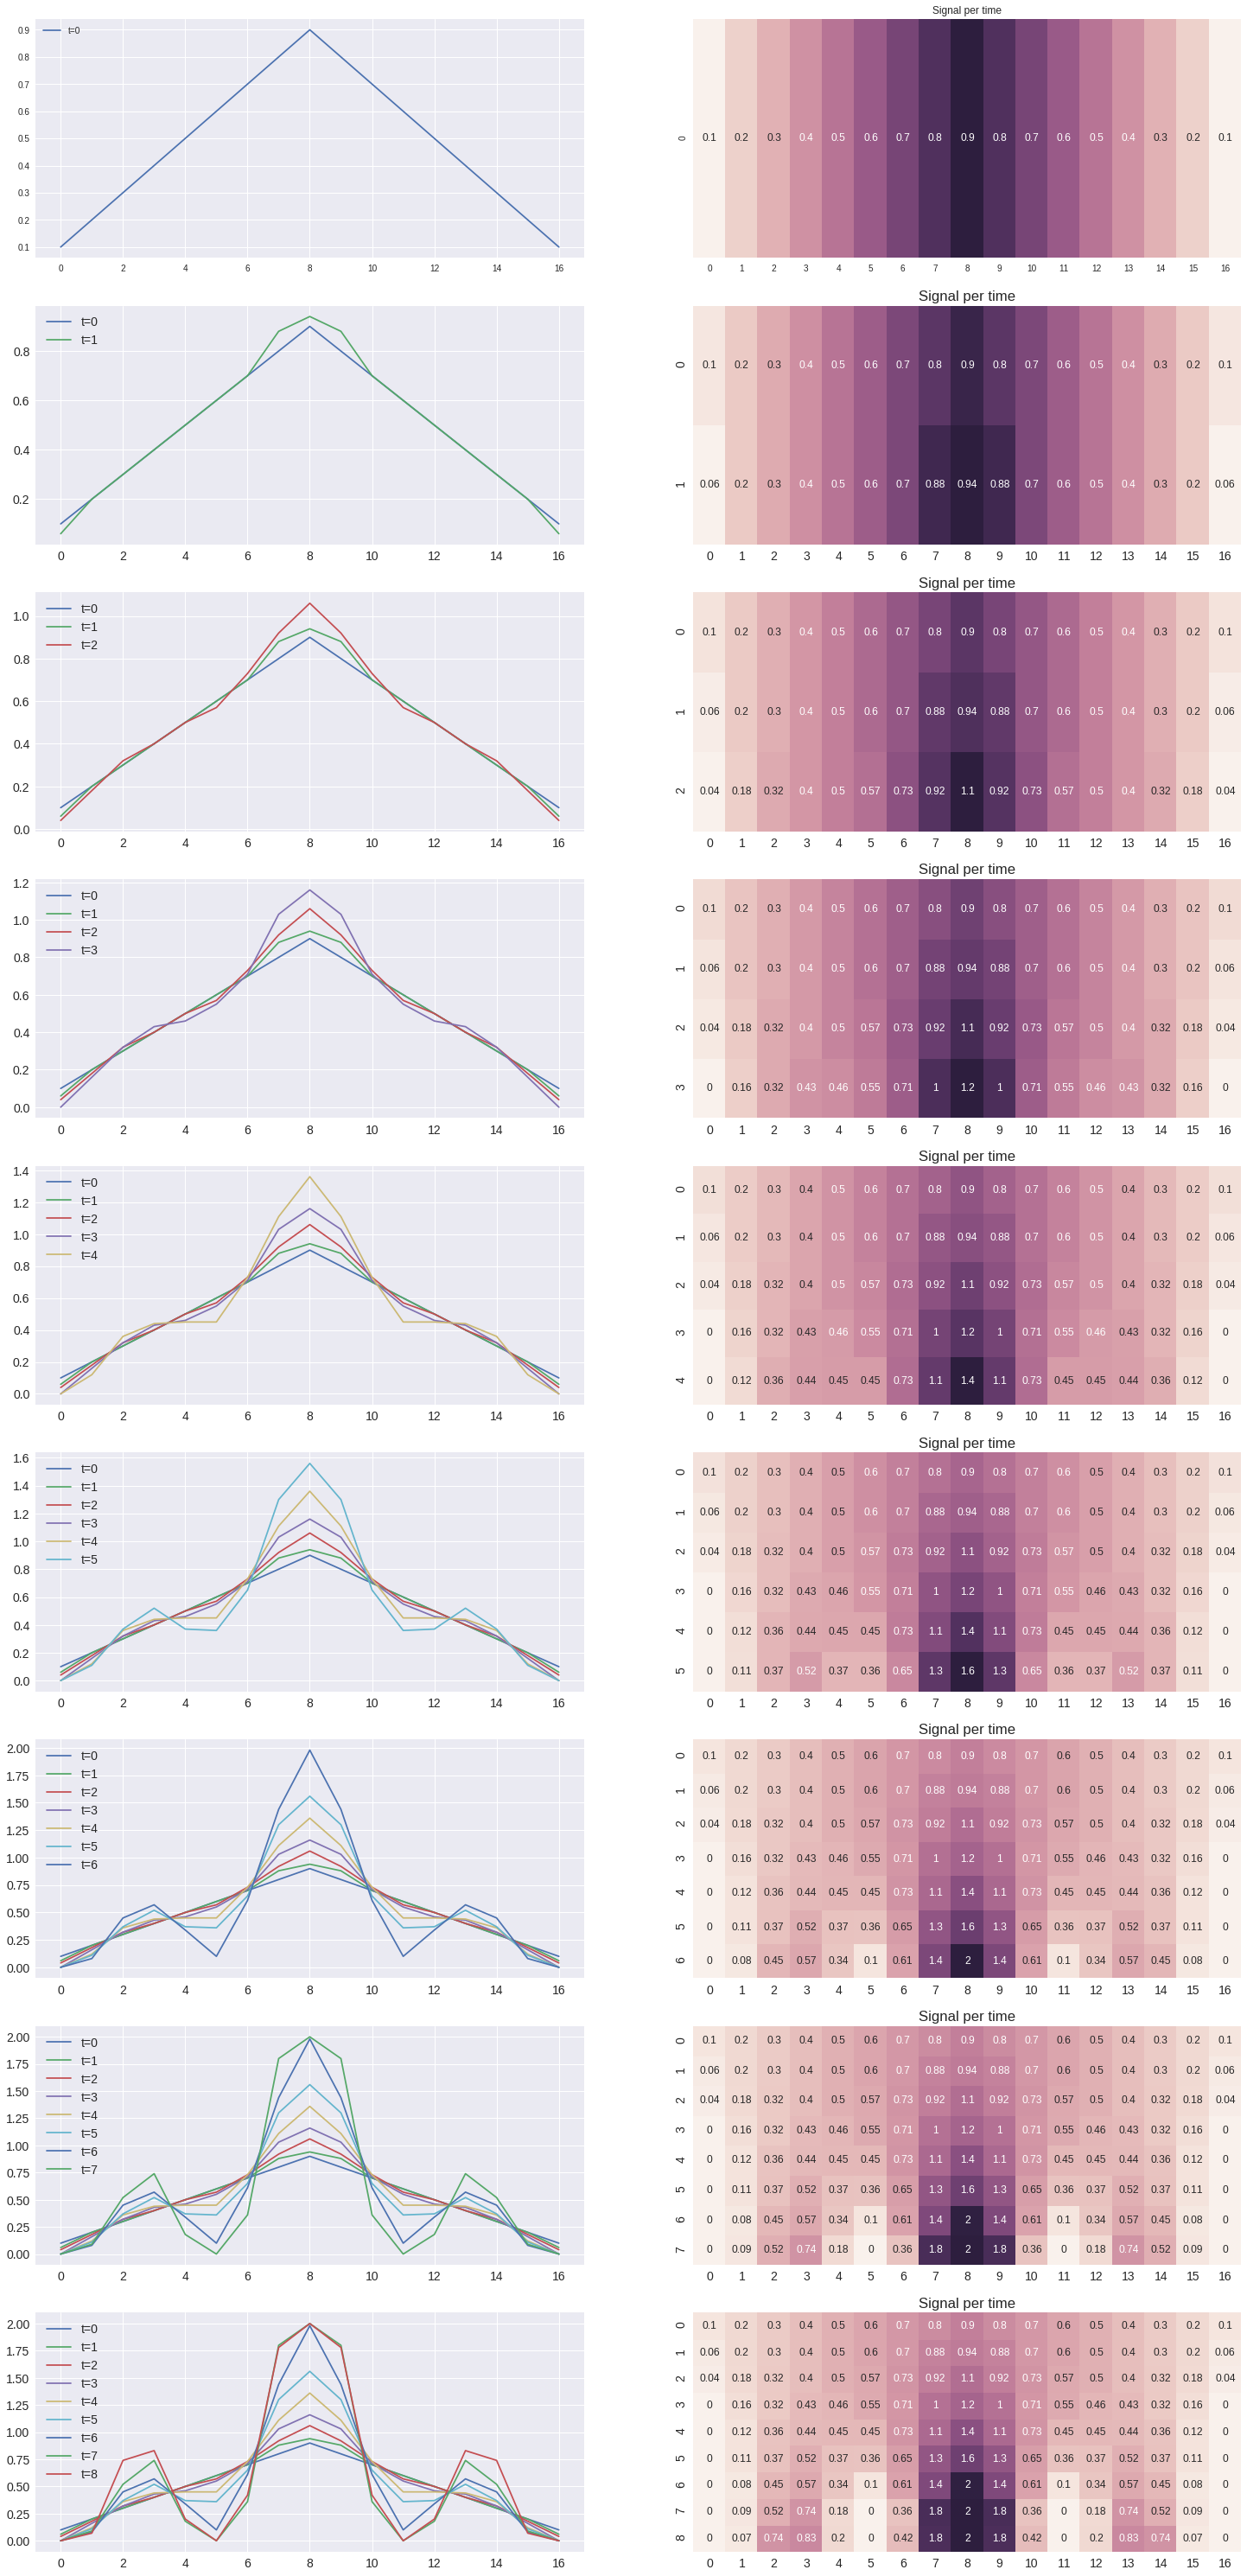

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd


def plot_mat(ax, mat, xlabels, ylabels):
    df = pd.DataFrame(mat, ylabels, xlabels)
    ax.set_title(f"Signal per time")
    ax.set_xlabel("Signal")
    ax.set_ylabel("Time")

    sn.set(font_scale=1.4)  # for label size
    sn.heatmap(df, annot=True, annot_kws={"size": 12},
               xticklabels=xlabels, yticklabels=ylabels, cbar=False)  # font size


def activation_fn(x):
    if x < 0:
        return 0
    elif x > 2:
        return 2
    else:
        return x


# step1 - initialize parameteres and weights
r1 = 1
r2 = 2
c1 = 0.6
c2 = 0.4
signal = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
m = len(signal)
fig = plt.figure(figsize=(25, 60))
_max = 10
f=1
for t_max in range(1, _max):
    x = signal.copy()  # step 2
    mat = np.zeros((t_max, m))
    if (f % 10 == 0):
        fig = plt.figure(figsize=(25, 60))
        f =1
    ax = fig.add_subplot(_max, 2, f) 
    f+=1
    for t in range(0, t_max):  # step 3 step 7 & 8
        x_old = x.copy()  # step 6
        ax.plot(x_old, label=f't={t}')
        ax.legend(loc='upper left')
        mat[t, :] = x_old
#         print('t = {}'.format(t + 1))
        for i in range(0, m):
            _r1 = i - r1 if i - r1 >= 0 else 0 #-r1
            _r2 = i - r2 if i - r2 >= 0 else 0 #-r2
            __r1 = i + r1 + 1 if i + r1 <= m else m #+r1
            __r2 = i + r2 + 1 if i + r2 <= m else m #+r2
#             plt.axvline(x=_r1)
#             plt.axvline(x=_r1)
#             plt.axvline(x=__r2)
#             plt.axvline(x=__r2)
            sum1 = sum((x_old[_r1:__r1])) #hamkar
            left = sum(x_old[_r2:_r1]) #raghib
            right = sum((x_old[__r1:__r2])) #raghib
            sum2 = left + right
            x[i] = activation_fn(round((c1 * sum1 - c2 * sum2), 2))  # step 4 & 5
#             print('	x{} = {}'.format(i, x[i]))

#     plt.show()
    ax = fig.add_subplot(_max, 2, f)
    plot_mat(ax, mat, range(m), range(t_max))
    f+=1

plt.show()


##Added by Benyamin

###A

17


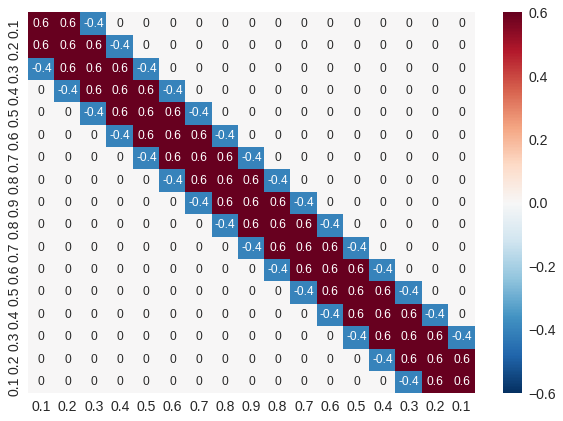

In [0]:
import numpy as np
c1 = 0.6; c2 = -0.4
R1 = 1; R2 = 2

signal = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

N = len(signal)
tr_mat = np.zeros([N, N])
for i in range(N):
  if i<N-(R1+R2)+1:
    tr_mat[i,i:i+R1+1] = c1
    #tr_mat[i,i+R1+1:i+R1+R2+1] = c2
    tr_mat[i,i+R1+1:i+R1+R2] = c2
  elif N-(R1+R2)+1<i<N-R1-2:
    tr_mat[i,i:i+R1+1] = c1
    tr_mat[i,i+R1+1:] = c2
  elif N-R1-2<i:
    tr_mat[i,i:] = c1

tr_mat = tr_mat + tr_mat.T - np.diag(tr_mat.diagonal())
print(N)    
import seaborn as sn
import pandas  as pd
import matplotlib.pyplot as plt
df_result = pd.DataFrame(tr_mat, range(N), range(N))

labels = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.8', '0.7', '0.6', '0.5', '0.4', '0.3', '0.2', '0.1']
#axlabels = ['C', 'I', 'O', 'P', 'S', 'U', 'X', 'Z', 'Total']

plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(df_result, annot=True, annot_kws={"size": 12}, xticklabels=labels, yticklabels=labels)  # font size
plt.show()

###B

17


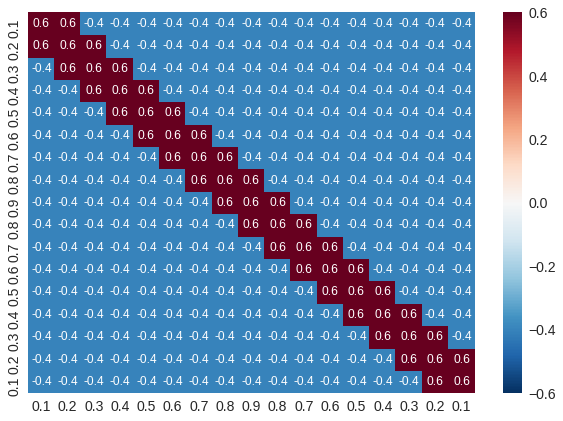

In [0]:
R1 = 1; #R2 = inf

tr_mat = np.zeros([N, N])
for i in range(N):
  if i<N-(R1+R2)+1:
    tr_mat[i,i:i+R1+1] = c1
    tr_mat[i,i+R1+1:] = c2
  elif N-R1-2<i:
    tr_mat[i,i:] = c1

tr_mat = tr_mat + tr_mat.T - np.diag(tr_mat.diagonal())
print(N)    
import seaborn as sn
import pandas  as pd
import matplotlib.pyplot as plt
df_result = pd.DataFrame(tr_mat, range(N), range(N))

labels = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.8', '0.7', '0.6', '0.5', '0.4', '0.3', '0.2', '0.1']
#axlabels = ['C', 'I', 'O', 'P', 'S', 'U', 'X', 'Z', 'Total']

plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(df_result, annot=True, annot_kws={"size": 12}, xticklabels=labels, yticklabels=labels)  # font size
plt.show()
#print(tr_mat)